# Questions


## 1. Given an array of non-negative numbers, find the minimum number of elements such that their sum is greater than the sum of the rest of the elements.

In [23]:
def find_minimum_number_of_elem(arr):
    # Sort the array in descending order
    arr.sort(reverse=True)

    # compute the total sum
    sum_of_arr = sum(arr)
    # find the pivot value
    half_sum = sum_of_arr / 2

    count = 0
    res_sum = 0

    # greedily find the elements
    for num in arr:
        res_sum += num
        count += 1
        if res_sum > half_sum:
            break
    return count

print(find_minimum_number_of_elem([4, 3, 1, 2, 5]))  # Output: 2
print(find_minimum_number_of_elem([1, 2, 3, 4, 5, 6]))  # Output: 2
print(find_minimum_number_of_elem([10, 20, 30, 5, 1]))  # Output: 2
print(find_minimum_number_of_elem([8, 8, 8, 8, 8]))  # Output: 3
print(find_minimum_number_of_elem([1, 1, 1, 1, 1, 50]))  # Output: 1

2
2
2
3
1


## 2. The vertext cover of a graph is the minimum set of all vertices such that at least one of the vertices of all the graphs edges belongs to the set
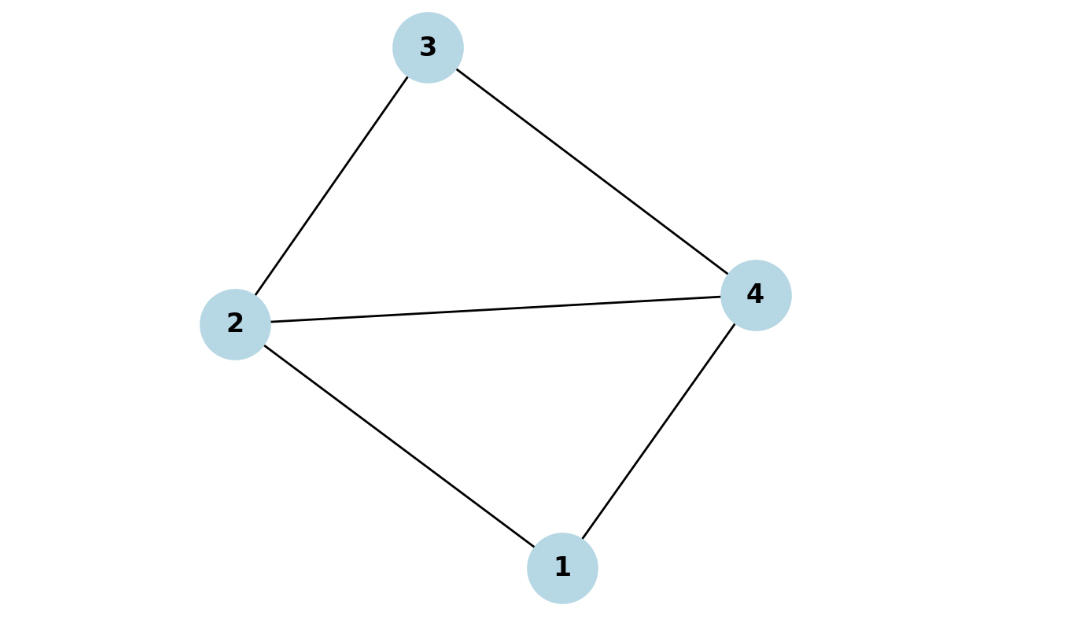

```
{2,4} is a vertex cover
```

Vertex Cover: {'A', 'E', 'C', 'D'}


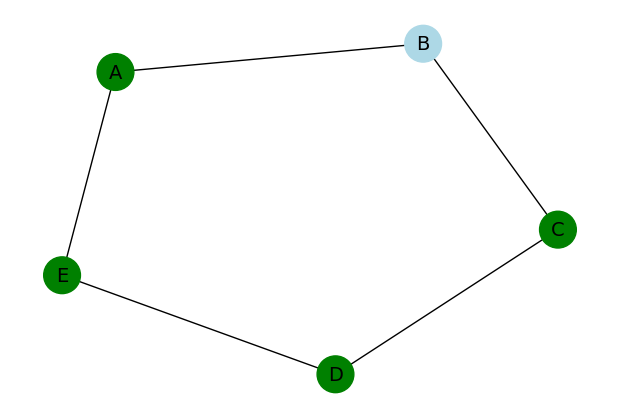

Vertex Cover: {0, 1, 3, 4, 5, 6}


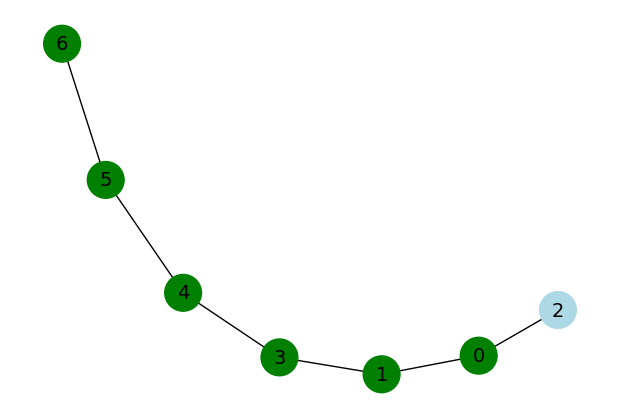

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        """ Initializes the graph with a given number of vertices """
        self.V = vertices
        self.graph = defaultdict(list)
        self.edges = []  # List to store edges for visualization
    
    def addEdge(self, u, v):
        """ Adds an undirected edge between nodes u and v """
        self.graph[u].append(v)
        self.graph[v].append(u)  # Since it's an undirected graph
        self.edges.append((u, v))
    
    def vertexCover(self):
        """ Finds an approximate vertex cover using a greedy approach """
        visited = set()
        cover = set()
        
        # Iterate over all nodes and pick an arbitrary edge (u, v) 
        # Add both u and v to the cover and mark them as visited
        for u in self.graph:
            if u not in visited:
                for v in self.graph[u]:
                    if v not in visited:
                        # Select both u and v for the vertex cover
                        visited.add(u)
                        visited.add(v)
                        cover.add(u)
                        cover.add(v)
                        break
        
        print("Vertex Cover:", cover)
        self.visualize(cover)
    
    def visualize(self, cover):
        """ Displays the graph with the vertex cover highlighted """
        G = nx.Graph()
        G.add_edges_from(self.edges)
        
        pos = nx.spring_layout(G)  # Compute node positions for visualization
        
        plt.figure(figsize=(6, 4))
        
        # Assign colors: red for nodes in the vertex cover, light blue otherwise
        node_colors = ['green' if node in cover else 'lightblue' for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=700, font_size=14)
        
        plt.show()

# Example 1
g = Graph(5)
g.addEdge('A', 'E')
g.addEdge('E', 'D')
g.addEdge('D', 'C')
g.addEdge('C', 'B')
g.addEdge('B', 'A')
g.vertexCover()

# Example 2
g = Graph(7)
g.addEdge(0, 1)
g.addEdge(0, 2) 
g.addEdge(1, 3) 
g.addEdge(3, 4) 
g.addEdge(4, 5) 
g.addEdge(5, 6) 
g.vertexCover()


## 3. Given a list of strings where no strings is a substring of another, find the shortest string that contains each string in the list as a substring. Solve it using both brute force and greedy

```python
['abb', 'bc', 'ccd'] # Output: abbccd
```


In [1]:
def permutations(lst):
    if len(lst) == 0:
        return []

    if len(lst) == 1:
        return [lst]

    res = []
    for i in range(len(lst)):
        selected_node = lst[i]
        rest = lst[:i] + lst[i+1:]

        for p in permutations(rest):
            res.append([selected_node] + p)
    return res

def merge_strings(s1, s2):
    best_merge = s1 + s2

    for i in range(1, len(s1) + 1):
        if s2.startswith(s1[-i: ]):
            merged = s1 + s2[i:]
            if len(merged) < len(best_merge):
                best_merge = merged

    for i in range(1, len(s2) + 1):
        if s1.startswith(s2[-i:]):
            merged = s2 + s1[i:]
            if len(merged) < len(best_merge):
                best_merge = merged
    
    return best_merge


def short_superstring_brute_force(words):
    min_superstring = None

    for perm in permutations(words):
        merged = perm[0]
        for word in perm[1:]:
            merged = merge_strings(merged, word)
    
        if min_superstring is None or len(merged) < len(min_superstring):
            min_superstring = merged
    return min_superstring


def short_superstring_greedy(words):
    pass

print(short_superstring_brute_force(['abb', 'bc', 'ccd']))
print(short_superstring_greedy(['abb', 'bc', 'ccd']))


abbccd
None


## 4. Given a sorted list of strings in klingon, give me the order of klingon alphabet
There is a new alien language which uses the latin alphabet. However, the order among letters are unknown to you. You receive a list of non-empty words from the dictionary, where words are sorted lexicographically by the rules of this new language. Derive the order of letters in this language.

```
Input:
[
  "wrt",
  "wrf",
  "er",
  "ett",
  "rftt"
]

Output: "wertf"

Input:
[
  "z",
  "x"
]

Output: "zx"
```



In [3]:
from collections import defaultdict

# Perform a Depth-First Search (DFS) for topological sorting
def dfs(graph, node, visited, stack):
    visited.add(node)  # Mark the current node as visited
    for neighbor in graph[node]:  # Traverse all neighbors
        if neighbor not in visited:
            dfs(graph, neighbor, visited, stack)  # Recursive DFS call
    stack.append(node)  # Push the node to stack after visiting all its neighbors

# DFS-based cycle detection function
def cycleDfs(graph, node, visited, rec_stack):
    visited.add(node)  # Mark node as visited
    rec_stack.add(node)  # Add to recursion stack (active path)

    for neighbor in graph[node]:  # Traverse all outgoing edges
        if neighbor not in visited:
            if cycleDfs(graph, neighbor, visited, rec_stack):  # Recursive DFS call
                return True  # Cycle detected
        elif neighbor in rec_stack:  # If the neighbor is already in recursion stack, cycle exists
            return True

    rec_stack.remove(node)  # Remove from recursion stack after visiting all neighbors
    return False  # No cycle found

# Function to check if a cycle exists in the graph
def isCycle(graph, all_chars):
    visited = set()  # Tracks visited nodes
    rec_stack = set()  # Tracks nodes in current DFS path (for cycle detection)
    
    for char in all_chars:  # Check each unique character in the graph
        if char not in visited:
            if cycleDfs(graph, char, visited, rec_stack):  # If cycle detected, return True
                return True
    return False  # No cycle found

# Main function to determine the alien language order
def find_klingon_alphabet(words):
    graph = defaultdict(set)  # Adjacency list representation of the graph
    visited = set()  # Tracks visited nodes for topological sorting
    stack = []  # Stores the topological order of characters
    
    # Build the Directed Graph based on given word ordering
    for i in range(len(words) - 1):
        word1, word2 = words[i], words[i + 1]
        min_length = min(len(word1), len(word2))

        # Invalid case: If the first word is a prefix of the second but longer, return ""
        if word1[:min_length] == word2[:min_length] and len(word1) > len(word2):
            return ""

        # Compare character by character to determine precedence (edges in the graph)
        for c1, c2 in zip(word1, word2):
            if c1 != c2:  # First mismatching character determines precedence
                graph[c1].add(c2)  # Create a directed edge c1 -> c2
                break  # Only first differing character matters

    all_chars = set("".join(words))  # Extract all unique characters from input words

    # Check for cycles in the graph (if found, return "")
    if isCycle(graph, all_chars):
        return -1

    # Perform DFS-based Topological Sorting
    for node in all_chars:  # Ensure all characters are processed
        if node not in visited:
            dfs(graph, node, visited, stack)

    return "".join(reversed(stack))  # Reverse the stack to get the correct order

# Test Cases
print(find_klingon_alphabet(["baa", "abcd", "abca", "cab", "cad"]))  # Expected: "bdac"
print(find_klingon_alphabet(["wrt", "wrf", "er", "ett", "rftt"]))   # Expected: "wertf"
print(find_klingon_alphabet(["z", "x"]))  # Expected: "zx"
print(find_klingon_alphabet(["z","x","z"]))  # Expected: -1 (Cycle detected)


bdac
wertf
zx
-1
